## Putting it all together


In [15]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.2.2'

### Creating device agnostic code 
This means if we have got access to GPU,our code will use it(for potentially faster computing)


In [16]:
# Setup device agnostic code 
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device : {device}")

Using device : cuda


In [17]:
! nvidia-smi

Sat Feb 21 01:30:41 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 581.80                 Driver Version: 581.80         CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   43C    P8              2W /  140W |     145MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [18]:
#Creating some data using linear regression formula y = weight * X + bias
weight = 0.6
bias = 0.9
#Create range values
start = 0 
end = 1
step = 0.02
X =torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X +bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.9000],
         [0.9120],
         [0.9240],
         [0.9360],
         [0.9480],
         [0.9600],
         [0.9720],
         [0.9840],
         [0.9960],
         [1.0080]]))

In [19]:
#Splitting the data
train_split = int(0.8 * len(X))
x_train,y_train = X[:train_split],y[:train_split]
x_test,y_test = X[train_split:],y[train_split:]
print(f"x_test {x_test}\ny_test {y_test}")

x_test tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])
y_test tensor([[1.3800],
        [1.3920],
        [1.4040],
        [1.4160],
        [1.4280],
        [1.4400],
        [1.4520],
        [1.4640],
        [1.4760],
        [1.4880]])


In [20]:
#Building a pytorch linear model    
class linear_reg(nn.Module):
    def __init__(self):
        super().__init__()
        #using nn.linear() for creating the model parameters
        self.Linear = nn.Linear(in_features=1,out_features=1) #in_features is number of inputs and _out features is number of outputs
        # Varies according to the dataset 
        # y = A^T * x + b

    def forward(self,x : torch.Tensor) -> torch.Tensor:
        return self.Linear(x)

#Set the manaul seed
torch.manual_seed(42)
#creating an instance of the model
model_1 = linear_reg()  
model_1 , model_1.state_dict()


(linear_reg(
   (Linear): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('Linear.weight', tensor([[0.7645]])),
              ('Linear.bias', tensor([0.8300]))]))

## Training
### 1.Loss fucntion
### 2.Optimizer
### 3.Training loop 
### 4.Testing loop

In [21]:
loss_fn = nn.L1Loss()#Same as mae
#Seting up the optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr = 0.01)



In [22]:
# put all the data on the gpu 
model_1.to(device)
next(model_1.parameters()).device
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

In [23]:
#Training loop
torch.manual_seed(42)
epochs= 220 
for epoch in range(epochs):
    model_1.train()
    #forward pass
    y_pred = model_1(x_train)
    #Calcualte the loss
    loss = loss_fn(y_pred,y_train)
    #optimizer
    optimizer.zero_grad()
    #Back propogation
    loss.backward()
    #Optimizer step
    optimizer.step()

#Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred_1 = model_1(x_test)
        test_loss_1 = loss_fn(test_pred_1,y_test)
        #Printing what is happening
    if epoch% 10 == 0:
        print(f"epcoh: {epoch}| loss : {loss}| test_loss {test_loss_1}")


epcoh: 0| loss : 0.03316082805395126| test_loss 0.07603206485509872
epcoh: 10| loss : 0.02970331907272339| test_loss 0.06844653934240341
epcoh: 20| loss : 0.02627069689333439| test_loss 0.06086103990674019
epcoh: 30| loss : 0.02283850498497486| test_loss 0.05258866772055626
epcoh: 40| loss : 0.01939966343343258| test_loss 0.04431630298495293
epcoh: 50| loss : 0.015968715772032738| test_loss 0.0367308147251606
epcoh: 60| loss : 0.012534837238490582| test_loss 0.02845846489071846
epcoh: 70| loss : 0.009096035733819008| test_loss 0.02018609084188938
epcoh: 80| loss : 0.0056667327880859375| test_loss 0.012600577436387539
epcoh: 90| loss : 0.0022311985958367586| test_loss 0.004328215029090643
epcoh: 100| loss : 0.0020006776321679354| test_loss 0.008916378021240234
epcoh: 110| loss : 0.0020006776321679354| test_loss 0.008916378021240234
epcoh: 120| loss : 0.0020006776321679354| test_loss 0.008916378021240234
epcoh: 130| loss : 0.0020006776321679354| test_loss 0.008916378021240234
epcoh: 140|

In [24]:
model_1.state_dict()

OrderedDict([('Linear.weight', tensor([[0.6051]], device='cuda:0')),
             ('Linear.bias', tensor([0.9000], device='cuda:0'))])

In [25]:
weight,bias

(0.6, 0.9)

In [26]:
model_1.eval()
with torch.inference_mode():
    y_preds = model_1(x_test)



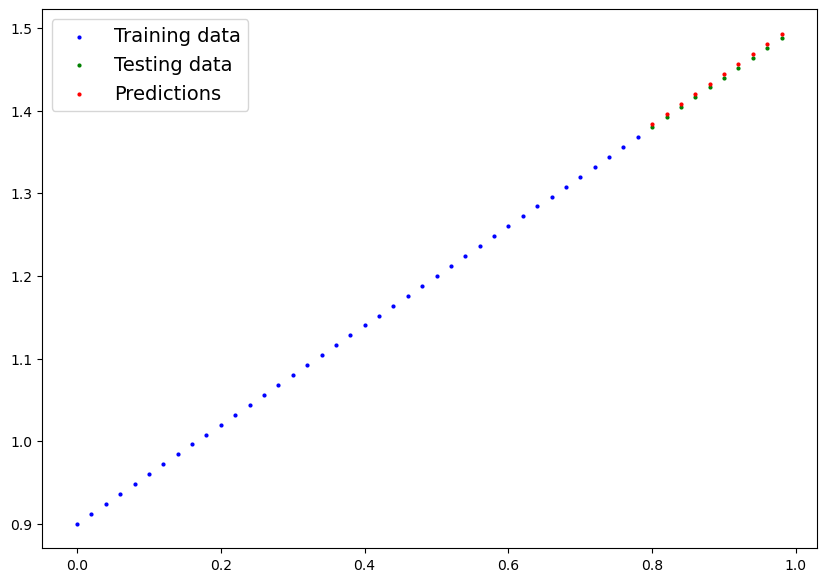

In [27]:

def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
    if predictions is not None:
        # Plot the predictions in red
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    plt.legend(prop={"size": 14})
    plt.show()

# Execute plot
plot_predictions(train_data=x_train.cpu(),
                 train_labels=y_train.cpu(),
                 test_data=x_test.cpu(),
                 test_labels=y_test.cpu(),
                 predictions=y_preds.cpu())
